# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [16]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max()+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

10


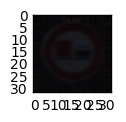

In [17]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

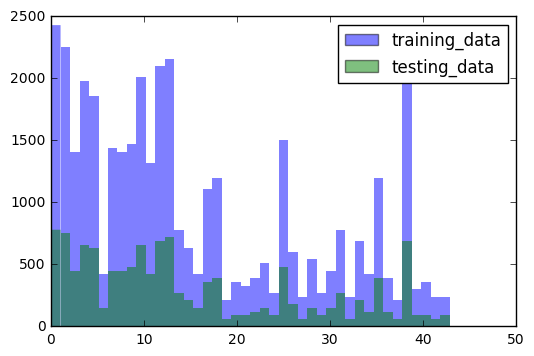

[['0,Speed limit (20km/h)']
 ['1,Speed limit (30km/h)']
 ['2,Speed limit (50km/h)']
 ['3,Speed limit (60km/h)']
 ['4,Speed limit (70km/h)']
 ['5,Speed limit (80km/h)']
 ['6,End of speed limit (80km/h)']
 ['7,Speed limit (100km/h)']
 ['8,Speed limit (120km/h)']
 ['9,No passing']
 ['10,No passing for vehicles over 3.5 metric tons']
 ['11,Right-of-way at the next intersection']
 ['12,Priority road']
 ['13,Yield']
 ['14,Stop']
 ['15,No vehicles']
 ['16,Vehicles over 3.5 metric tons prohibited']
 ['17,No entry']
 ['18,General caution']
 ['19,Dangerous curve to the left']
 ['20,Dangerous curve to the right']
 ['21,Double curve']
 ['22,Bumpy road']
 ['23,Slippery road']
 ['24,Road narrows on the right']
 ['25,Road work']
 ['26,Traffic signals']
 ['27,Pedestrians']
 ['28,Children crossing']
 ['29,Bicycles crossing']
 ['30,Beware of ice/snow']
 ['31,Wild animals crossing']
 ['32,End of all speed and passing limits']
 ['33,Turn right ahead']
 ['34,Turn left ahead']
 ['35,Ahead only']
 ['36,Go st

In [18]:
import random
import numpy as np
from matplotlib import pyplot
import pandas

training_data = y_train
testing_data= y_test
data_1 = pandas.read_table('signnames.csv', names=['Signs'])

data_1 = data_1.as_matrix()
data_1 = data_1[1:]

bins = np.linspace(0, 50, 50)
pyplot.hist(training_data, bins, alpha=0.5, label='training_data', edgecolor='none')
pyplot.hist(testing_data, bins, alpha=0.5, label='testing_data', edgecolor='none')
pyplot.legend(loc='upper right')
pyplot.show()
print(data_1)

counters = [0 for i in range(43)]

for i in range(43):
    for j in range(len(training_data)):
        if i == training_data[j]:
            counters[i] += 1
max_index = 0
for i in range(len(counters)):
    if counters[i] == max(counters):
        max_index = i
        
print("\n\nmax no. of element occurency is:",max(counters) , "at index:", data_1[max_index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [37]:
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
import numpy as np
    
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Updated Image Shape: {}".format(X_train[0].shape))

### Generate additional data (OPTIONAL!)

print((X_train).shape)
print(len(X_train))
print((y_train).shape)
print(len(y_train))

counters = [0 for i in range(43)]

for i in range(43):
    for j in range(len(y_train)):
        if i == y_train[j]:
            counters[i] += 1
max_index = 0
for i in range(len(counters)):
    if counters[i] == max(counters):
        max_index = i
        
counters_max = max(counters)
print("\n\nmax no. of element occurency is:",max(counters) , "at index:", data_1[max_index])

Updated Image Shape: (32, 32, 3)
(61782, 32, 32, 3)
61782
(61782,)
61782


max no. of element occurency is: 4761 at index: ['4,Speed limit (70km/h)']


In [21]:
import cv2
from scipy import ndimage

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def rotate_90(img):
    #rotation angle in degree
    rotated = ndimage.rotate(img, 90)
    return rotated

def rotate_180(img):
    #rotation angle in degree
    rotated = ndimage.rotate(img, 180)
    return rotated

def rotate_270(img):
    #rotation angle in degree
    rotated = ndimage.rotate(img, 270)
    return rotated

image_blur = gaussian_blur(image, 3)
image_gray = grayscale(image_blur)
canny_image = canny(image_gray, 50, 100)
canny_image = canny_image.reshape(canny_image.shape + (1,))
canny_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2RGB)

rotate_90_image = rotate_90(image)
rotate_180_image = rotate_180(image)
rotate_270_image = rotate_270(image)

print("norm shape:", image.shape)
print("blurr shape:", image_blur.shape)
print("gray shape:", image_gray.shape)
print("canny shape:", canny_image.shape)
print("rotate_90_image shape:", rotate_90_image.shape)
print("rotate_180_image shape:", rotate_180_image.shape)
print("rotate_270_image shape:", rotate_270_image.shape)


norm shape: (32, 32, 3)
blurr shape: (32, 32, 3)
gray shape: (32, 32, 3)
canny shape: (32, 32, 3)
rotate_90_image shape: (32, 32, 3)
rotate_180_image shape: (32, 32, 3)
rotate_270_image shape: (32, 32, 3)


In [22]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(image,ang_range,shear_range,trans_range):
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    #Brightness augmentation
    image = augment_brightness_camera_images(image)
    
    return image

#add a blurred image and an edge detected image for every item already in the training dataset
def process_edges(img):
    image_blur = gaussian_blur(img, 3)
    image_gray = grayscale(image_blur)
    canny_image = canny(image_gray, 50, 100)
    canny_image = canny_image.reshape(canny_image.shape + (1,))
    canny_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2RGB)
    
    return canny_image

#add rotation to each of the image in the dataset

# for i in range(len(X_train)):
#     X_train = np.concatenate((X_train, np.expand_dims(rotate_90(X_train[i]), axis=0)), axis=0)
#     y_train = np.append(y_train, y_train[i])
#     X_train = np.concatenate((X_train, np.expand_dims(rotate_180(X_train[i]), axis=0)), axis=0)
#     y_train = np.append(y_train, y_train[i])
#     X_train = np.concatenate((X_train, np.expand_dims(rotate_270(X_train[i]), axis=0)), axis=0)
#     y_train = np.append(y_train, y_train[i])
    
#     if i%1000 == 0:
#         print(i)
    
# print((X_train).shape)
# print(len(X_train))
# print((y_train).shape)
# print(len(y_train))

In [27]:
counter_difference = [0 for i in range(len(counters))]
processing_indexes = [0 for i in range(len(counters))]

#check how many more elements needed for equal training balance
for i in range(len(counters)):
    for j in range((max(counters) - counters[i])):
        counter_difference[i] += 1
        
print(counter_difference)

#check an image for each type to use for generation
for i in range(len(counters)):
    for j in range(len(y_train)):
        if i == y_train[j]:
            processing_indexes[i] = j
            
print(processing_indexes)
    
#make up the difference by processing extra data    
for i in range(len(counters)):
    print("processing type:", i)
    
    for j in range(counter_difference[i]):
        X_train = np.concatenate((X_train, np.expand_dims(transform_image(X_train[processing_indexes[i]], 270, 6, 20), axis=0)), axis=0)
        y_train = np.append(y_train, y_train[i])
        k = 1
    print(j)
        
# print((X_train).shape)
# print(len(X_train))
# print((y_train).shape)
# print(len(y_train))

[1629, 56, 0, 668, 186, 326, 1466, 631, 671, 639, 193, 723, 90, 64, 1204, 1294, 1463, 905, 820, 1625, 1501, 1534, 1483, 1374, 1584, 581, 1322, 1602, 1355, 1588, 1431, 1171, 1602, 1248, 1473, 853, 1479, 1621, 105, 1557, 1527, 1620, 1597]
[31346, 31358, 31357, 31353, 31302, 31352, 31347, 31362, 31345, 31327, 31363, 31349, 31361, 31366, 31341, 31299, 31219, 31279, 31364, 31173, 31271, 31292, 31320, 31318, 31365, 31326, 31334, 31340, 31322, 31235, 31101, 31350, 31331, 31354, 31272, 31332, 31285, 31325, 31316, 31351, 31232, 31019, 31317]
processing type: 0
1628
processing type: 1
55
processing type: 2
55
processing type: 3
667
processing type: 4
185
processing type: 5
325
processing type: 6
1465
processing type: 7
630
processing type: 8
670
processing type: 9
638
processing type: 10
192
processing type: 11
722
processing type: 12
89
processing type: 13
63
processing type: 14
1203
processing type: 15
1293
processing type: 16
1462
processing type: 17
904
processing type: 18
819
processing typ

In [39]:
counters = [0 for i in range(43)]

for i in range(43):
    for j in range(len(y_train)):
        if i == y_train[j]:
            counters[i] += 1
            
counter_difference = [0 for i in range(43)]

#check how many more elements needed for equal training balance
for i in range(len(counters)):
    for j in range((max(counters) - counters[i])):
        counter_difference[i] += 1
        
print(len(counters)/counters_max)

0.009031716026044948


20


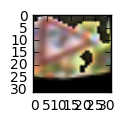

In [40]:
#show random image
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

20


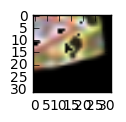

In [41]:
#show the transformed version
image = X_train[index].squeeze()
image = transform_image(image, 270, 6, 20)
plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

20


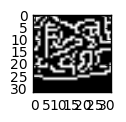

In [42]:
#show the edge processed version
image = process_edges(X_train[index]).squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

print(y_train[index])

In [43]:
#shuffle the datasets again after training data addition

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1- Shuffeled the data to make sure that the order doesn't affect the output

2- Split the training file to a training set and a validation set with 80% and 20% respectively starting with 0.2 as suggested (rule of thumb)

2- double check the image shape is still intact

3- above I added code to blurr the images and add to the training (canceled)

4- above I added code to rotate the images 90. 180, and 270 degrees and add it to the training (canceled)

5- the transform function creates a random shift, rotation, and colour augmentation each time.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


1- check for the maximum occurence amongst the training elements

2- check the difference needed for all element types to be of the same size for the training dataset

3- select a random representative for each type

4- loop through the transform function enough times to make up the count difference

5- end up with an equally sized input dataset for each element




In [44]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#Setup tensorflowAnswer
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

LeNet implemenation from the lesson modified for 3 input depth

Layer 1: Convolutional. The output shape should be 28x28x6. Relu Activation. Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16. Relu Activation. Pooling. The output shape should be 5x5x16.

Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.

Layer 3: Fully Connected. This should have 120 outputs. Relu Activation.

Layer 4: Fully Connected. This should have 84 outputs. Relu Activation.

Layer 5: Fully Connected (Logits). This should have 43 outputs.

In [45]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

EPOCHS = 25
BATCH_SIZE = 256

#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#model training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet-TSC')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.288

EPOCH 2 ...
Validation Accuracy = 0.470

EPOCH 3 ...
Validation Accuracy = 0.599

EPOCH 4 ...
Validation Accuracy = 0.665

EPOCH 5 ...
Validation Accuracy = 0.722

EPOCH 6 ...
Validation Accuracy = 0.770

EPOCH 7 ...
Validation Accuracy = 0.769

EPOCH 8 ...
Validation Accuracy = 0.812

EPOCH 9 ...
Validation Accuracy = 0.819

EPOCH 10 ...
Validation Accuracy = 0.802

EPOCH 11 ...
Validation Accuracy = 0.837

EPOCH 12 ...
Validation Accuracy = 0.842

EPOCH 13 ...
Validation Accuracy = 0.831

EPOCH 14 ...
Validation Accuracy = 0.871

EPOCH 15 ...
Validation Accuracy = 0.875

EPOCH 16 ...
Validation Accuracy = 0.864

EPOCH 17 ...
Validation Accuracy = 0.871

EPOCH 18 ...
Validation Accuracy = 0.880

EPOCH 19 ...
Validation Accuracy = 0.880

EPOCH 20 ...
Validation Accuracy = 0.882

EPOCH 21 ...
Validation Accuracy = 0.892

EPOCH 22 ...
Validation Accuracy = 0.892

EPOCH 23 ...
Validation Accuracy = 0.888

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Optimizer: Adam Optimizer

batch size: 256

no. of epochs: 25

training rate: 0.001

mean mu: 0

std. deviation sigma: 0.1 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

the LeNet model architecture is the starting point of this project as a well known model with consistently positive results it seems like a good place to start and then tune accordingly for the best output (as given in the lab).

training accuracy: 0.903

increased the batch size to 128 from 256

training accuracy: 0.928

increased the batch size to 256 from 512

training accuracy: 0.902

return to batch size to 256. increase epochs from 10 to 20

training accuracy: 0.942

increase epochs from 20 to 30

training accuracy: 0.946

not much difference, return epochs to 25. increase the learning rate to 0.002

training accurace: 0.944

not much difference, decrease the learning rate to 0.0005

training accurace: 0.937

not much difference (improvement less erratic however), decrease the learning rate to 0.0001

training accurace: 0.684

big difference, will require testing with a much higher number of epochs. return rate to 0.001.
Change the training data by adding blurred versions of the images as well as canny edged versions (tripling the dataset size)

training accuracy: 0.966

good differnce, and increase in the overall accuracy. Change the training data by adding rotations (tripling the dataset size)

training accuracy: 0.944

not a strong different with the last attempt. Continue to see if testing performance would be better







---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(1, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(6, 32, 32, 3)


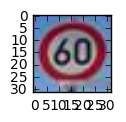

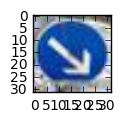

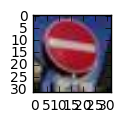

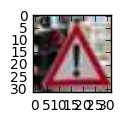

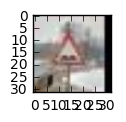

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
from PIL import Image


#reading in an image
# collection = mpimg()
images = ['test132.jpg','test232.jpg','test532.jpg','test632.jpg','test832.jpg']


#****initialised with something from the training set to hold the same dimensions
X_test_short = np.expand_dims(X_train[0], axis=0)
print(X_test_short.shape)


#answers for the test images
y_test_short = [y_train[0], 3, 38, 14, 18, 22]

for ima in images:
    image = mpimg.imread(ima)
    
    print(image.shape)
    
    X_test_short = np.concatenate((X_test_short, np.expand_dims(image, axis=0)), axis=0)
    plt.figure()
    
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    
print(X_test_short.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

the size of the image

its real-estate within the image

the presence of other signs in the images

In [91]:
### Run the predictions here
import tensorflow as tf
import pickle

### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

test_accu = test_accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(len(y_test_short)):
        
        test_accuracy = evaluate(X_test_short[i:i+1], y_test_short[i:i+1])

        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
        
    test_accuracy = evaluate(X_test_short, y_test_short)

    short_test_accu = test_accuracy
    print("Test Accuracy = {:.3f}".format(test_accuracy))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/da7th/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/da7th/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/da7th/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-254b7a9efeaf>", line 12, in <module>
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
  File "/home/da7th/.local/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/home/da7th/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/home/da7th/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/da7th/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/da7th/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

no it didn't get one of the signs and I believe it to be due to the size of the sign within the image. the accuracy is 80% for downloaded images and 87.3% for the testing dataset.

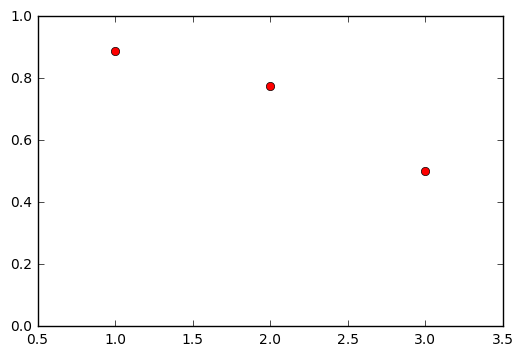

TopKV2(values=array([[  8.47621918e-01,   1.28838018e-01,   1.38043854e-02],
       [  9.97012734e-01,   2.98727513e-03,   5.18554288e-27],
       [  1.00000000e+00,   3.06210235e-09,   4.23584640e-10],
       [  9.99981880e-01,   1.81471860e-05,   8.58480753e-09],
       [  9.99823630e-01,   1.76350542e-04,   4.09978629e-20],
       [  9.93124545e-01,   6.87544048e-03,   4.97779818e-19]], dtype=float32), indices=array([[14, 16, 29],
       [16, 14, 13],
       [14, 32, 16],
       [14, 16, 32],
       [14, 16, 32],
       [16, 14, 32]], dtype=int32))


In [49]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
plt.plot([1,2,3], [validation_accuracy, test_accu, short_test_accu], 'ro')
plt.axis([0.5,3.5, 0, 1])
plt.show()


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.float32, (None))

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, 3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    tk = sess.run(top_k, feed_dict={x: X_test_short})
    print(format(tk))

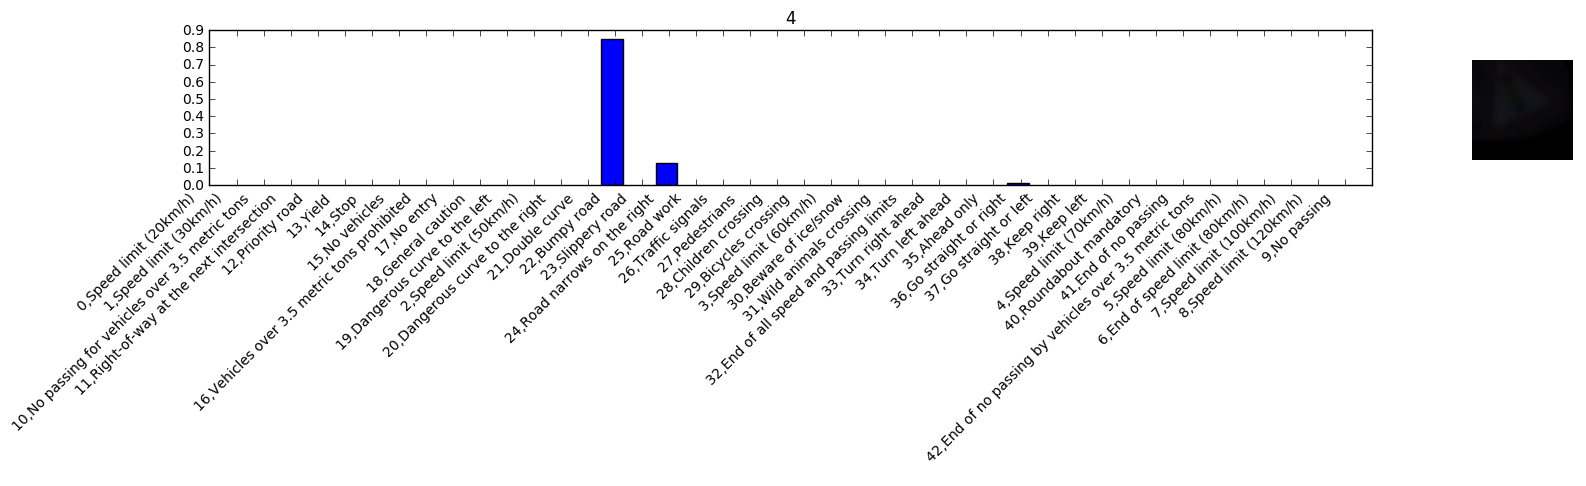

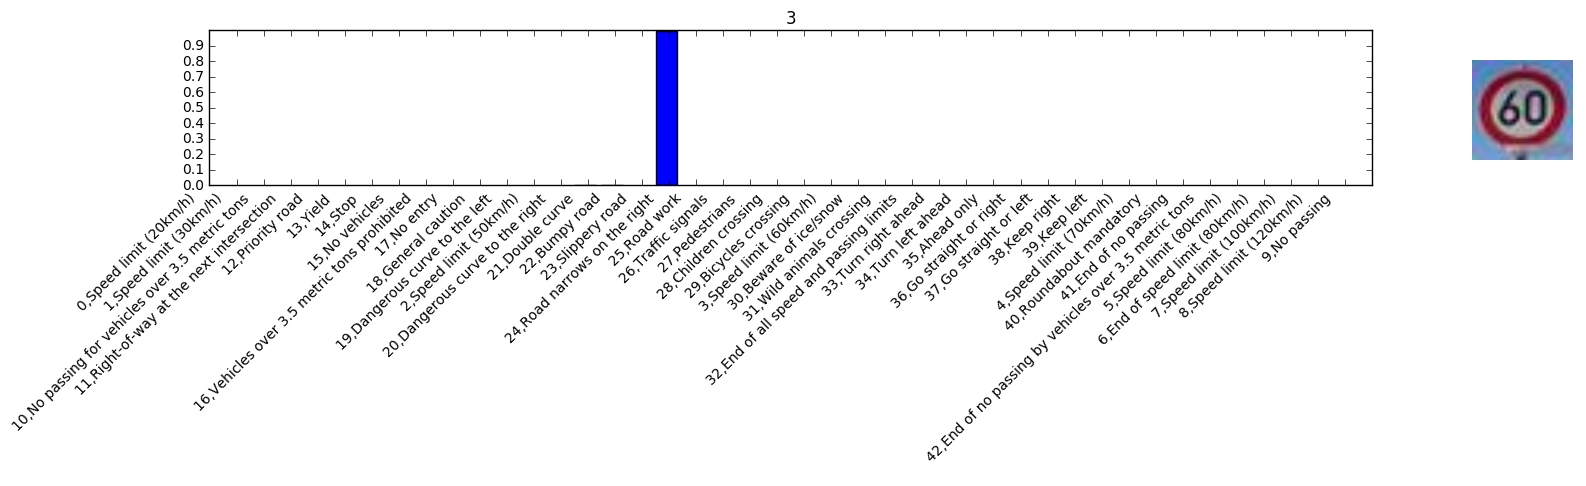

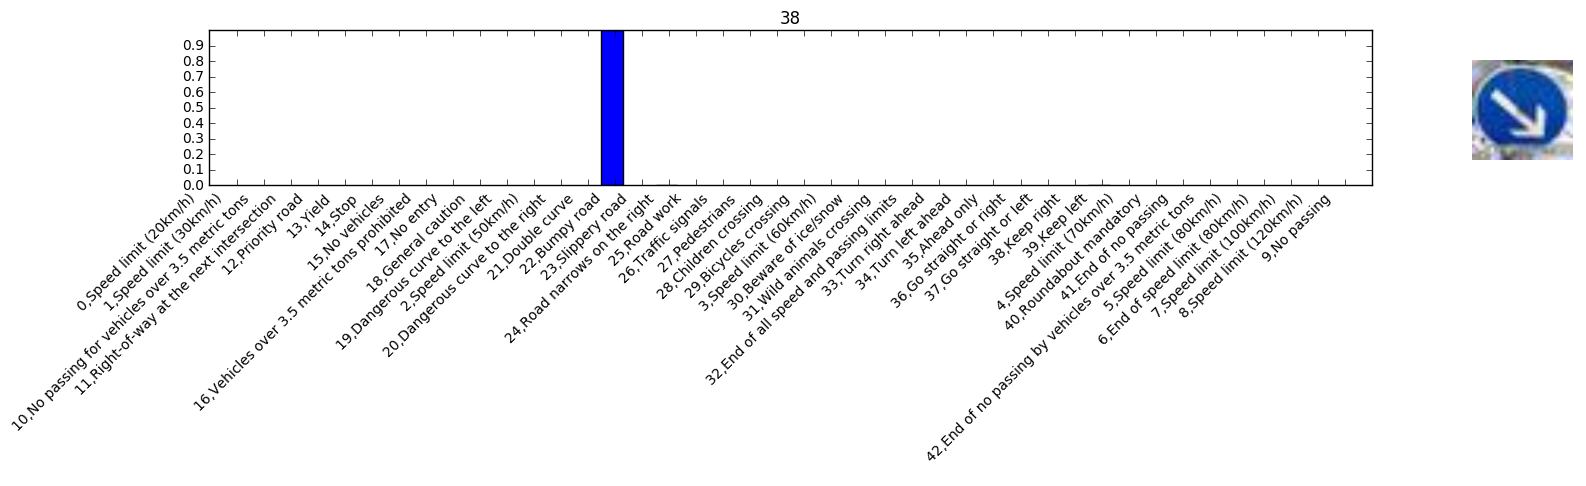

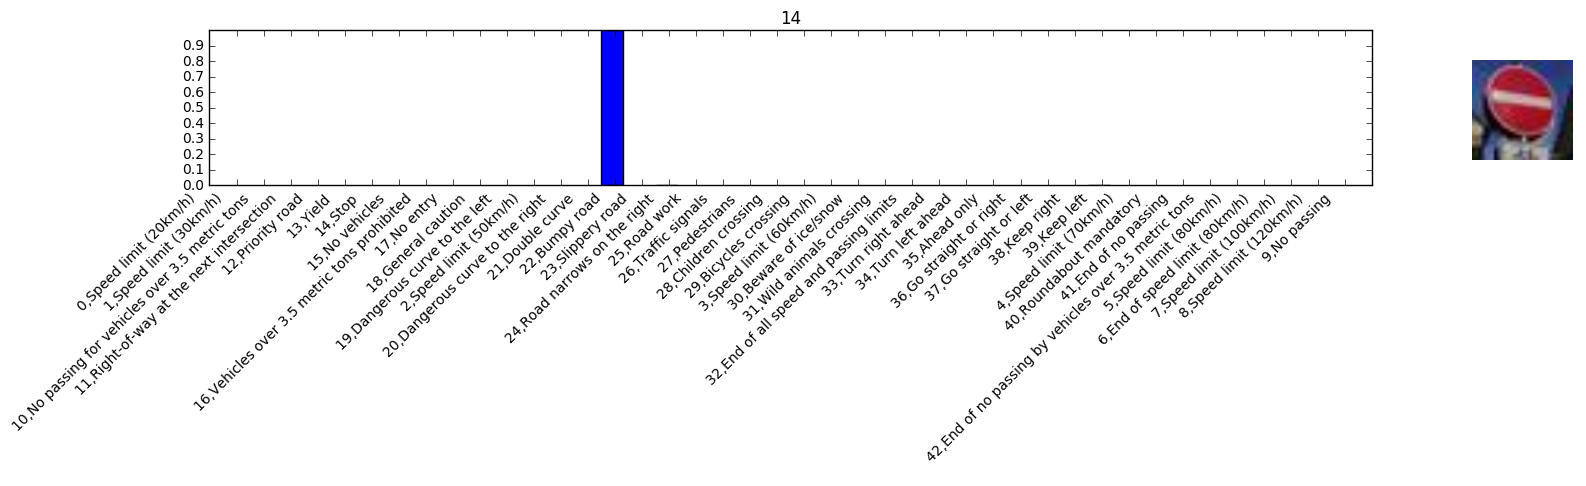

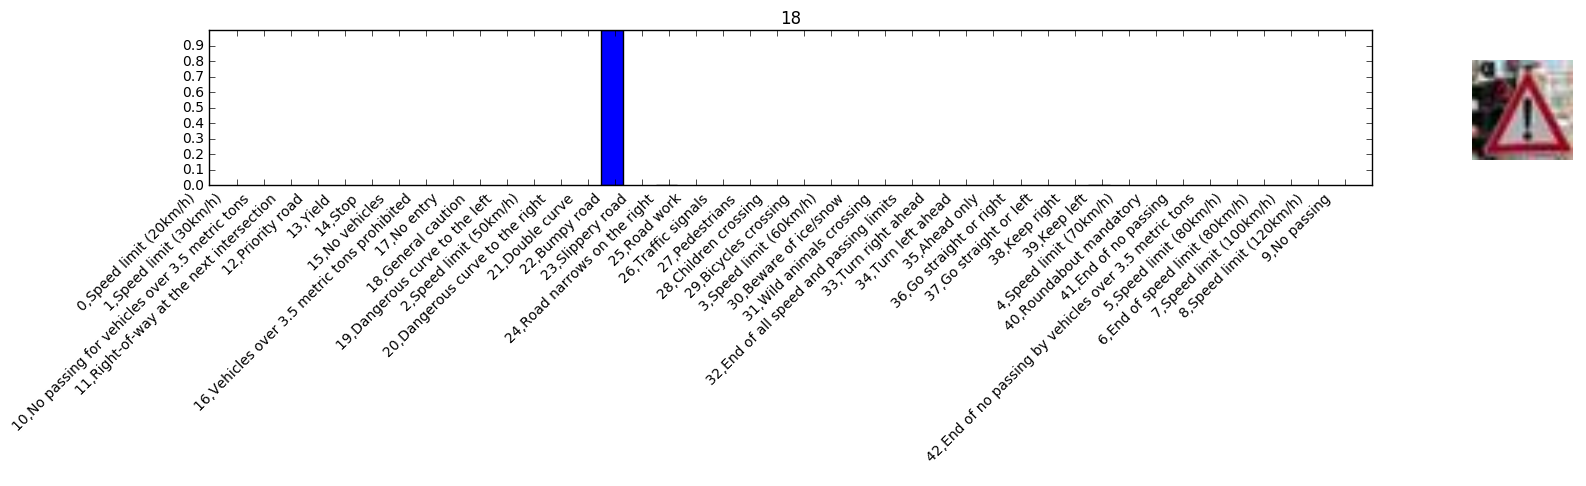

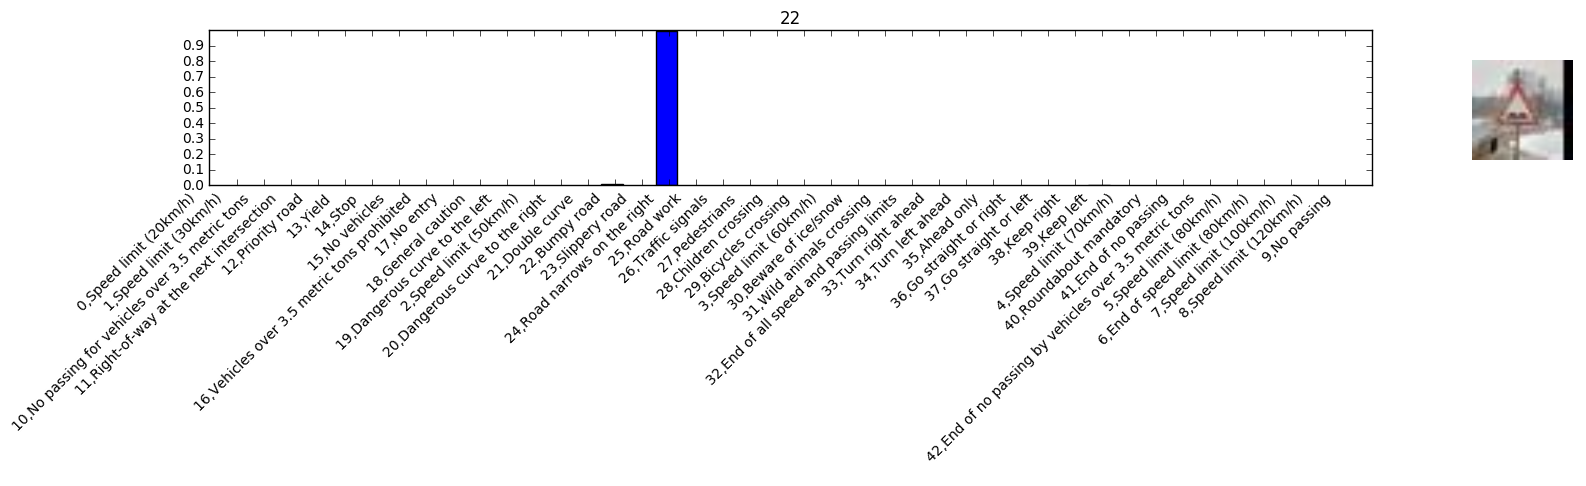

In [88]:
### from GITHUB dmlc/mxnet
import pandas as pd

def get_label_map(fname):
   labelmap = {}
   fi = open(fname)
   fi.readline()
   for line in fi:
       arr = line.split(',')
       labelmap[arr[0]] = line
   return labelmap


result = get_label_map('signnames.csv')
result_array = np.sort(pd.Series(result))

for i, (labels, probs, candidate) in enumerate(zip(tk.indices, tk.values, X_test_short)):
    fig = plt.figure(figsize = (15, 2))
    plt.bar(labels,probs)
    plt.title(y_test_short[i])
    height = candidate.shape[0]
    plt.xticks(np.arange(-0.5, 43.5, 1.0), result_array, ha='right', rotation = 45)
    plt.yticks(np.arange(0.0,1.0,0.1), np.arange(0.0, 1.0, 0.1))
    
    ax = plt.axes([.75, 0.25, 0.5, 0.5], frameon=True)
    ax.imshow(candidate)
    ax.axis('off')

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

it should be

it seems to be very sure about the wrong answers...

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.